# This file is for data visulization of the news dataset

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Read the News_Category_Dataset

In [28]:
dataset = pd.read_json('data_set/News_Category_Dataset_v3.json', lines = True)
dataset.head(2)
# This .json file does not have a nested structure, which means there are values in .json file which is another .json file
#In that case, we need to flatten the data set useing pd.json_normalize

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23


In [29]:
dataset.shape

(209527, 6)

In [30]:
dataset['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [31]:
data_politics = dataset[dataset['category']=="POLITICS"]
data_politics.shape

(35602, 6)

In [32]:
data_politics.head()

,link,headline,category,short_description,authors,date
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18
40,https://www.huffpost.com/entry/afghan-adjustme...,Bill To Help Afghans Who Escaped Taliban Faces...,POLITICS,Republican outrage over the shoddy U.S. withdr...,Hamed Ahmadi and Arthur Delaney,2022-09-16
44,https://www.huffpost.com/entry/capitol-riot-in...,Mark Meadows Complies With Justice Dept. Subpo...,POLITICS,The former White House chief of staff has turn...,"ERIC TUCKER, AP",2022-09-15


# Plot the data based on the date

In [33]:
dataset['date'] = pd.to_datetime(dataset['date'])

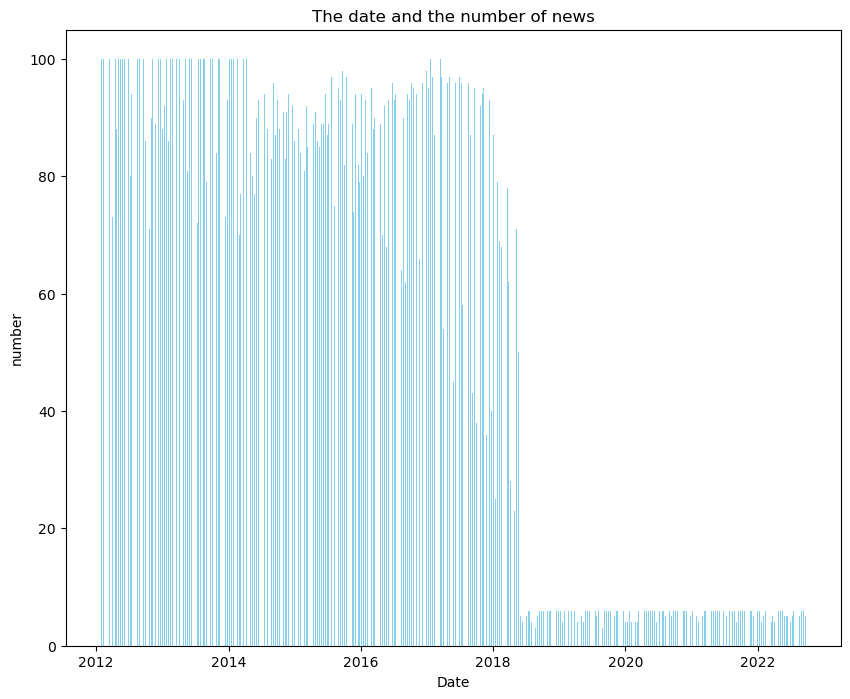

In [34]:
plt.figure(figsize=(10,8))

plt.hist(dataset["date"], bins= 10000, color="skyblue")

plt.title("The date and the number of news")
plt.xlabel('Date')
plt.ylabel('number')

plt.legend
plt.show()

In [35]:
dataset['date'].value_counts()

date
2014-03-25    100
2013-10-25    100
2014-04-17    100
2013-02-04    100
2013-02-05    100
             ... 
2018-08-17      2
2020-01-29      2
2018-08-28      2
2018-08-29      2
2022-01-07      2
Name: count, Length: 3890, dtype: int64

In [36]:
filter_date = '2018-01-01'
dataset_filtered = dataset[dataset['date'] > filter_date]
dataset_filtered['date'].value_counts()
print(dataset_filtered['date'].value_counts().describe())

count    1726.000000
mean        9.979722
std        16.243051
min         2.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        98.000000
Name: count, dtype: float64


In [37]:
#print(dataset_filtered['date'].head())
#print(dataset_filtered['date'].value_counts())

unique_date_filtered = dataset_filtered['date'].drop_duplicates().sort_values()
print(unique_date_filtered.shape)
print(dataset_filtered['date'].value_counts().shape)

(1726,)
(1726,)


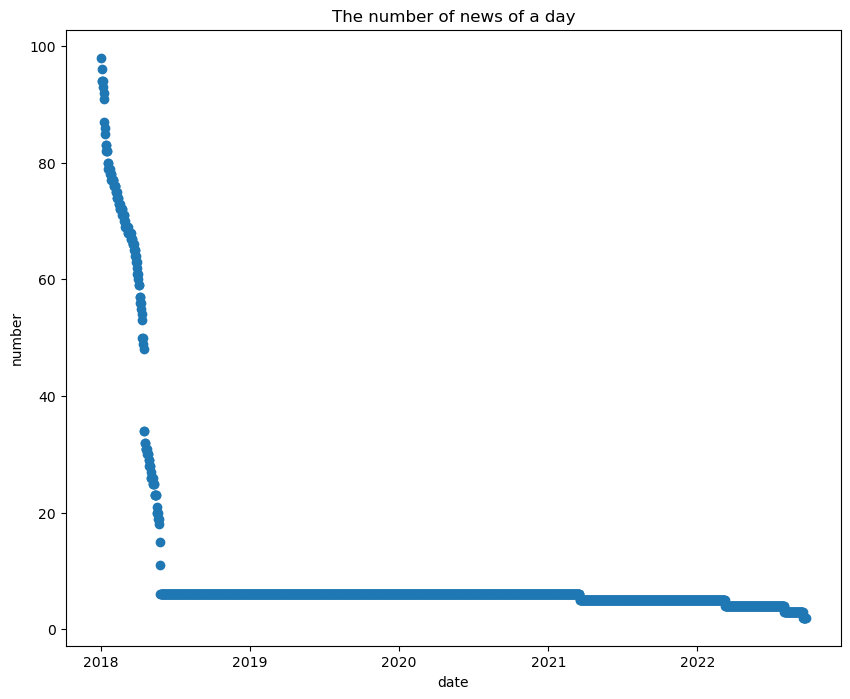

In [38]:
plt.figure(figsize=(10,8))

plt.scatter(unique_date_filtered, dataset_filtered['date'].value_counts())

plt.title('The number of news of a day')
plt.xlabel("date")
plt.ylabel("number")

plt.legend
plt.show()

The time series data is not evenly distributed. After 2018, there will be only 2 news per day. The singnal is too weak to predict the stock price. So we may need to switch the data set to the "all news" dataset. And for this data set, we can build a classifier of news based on their headlines.

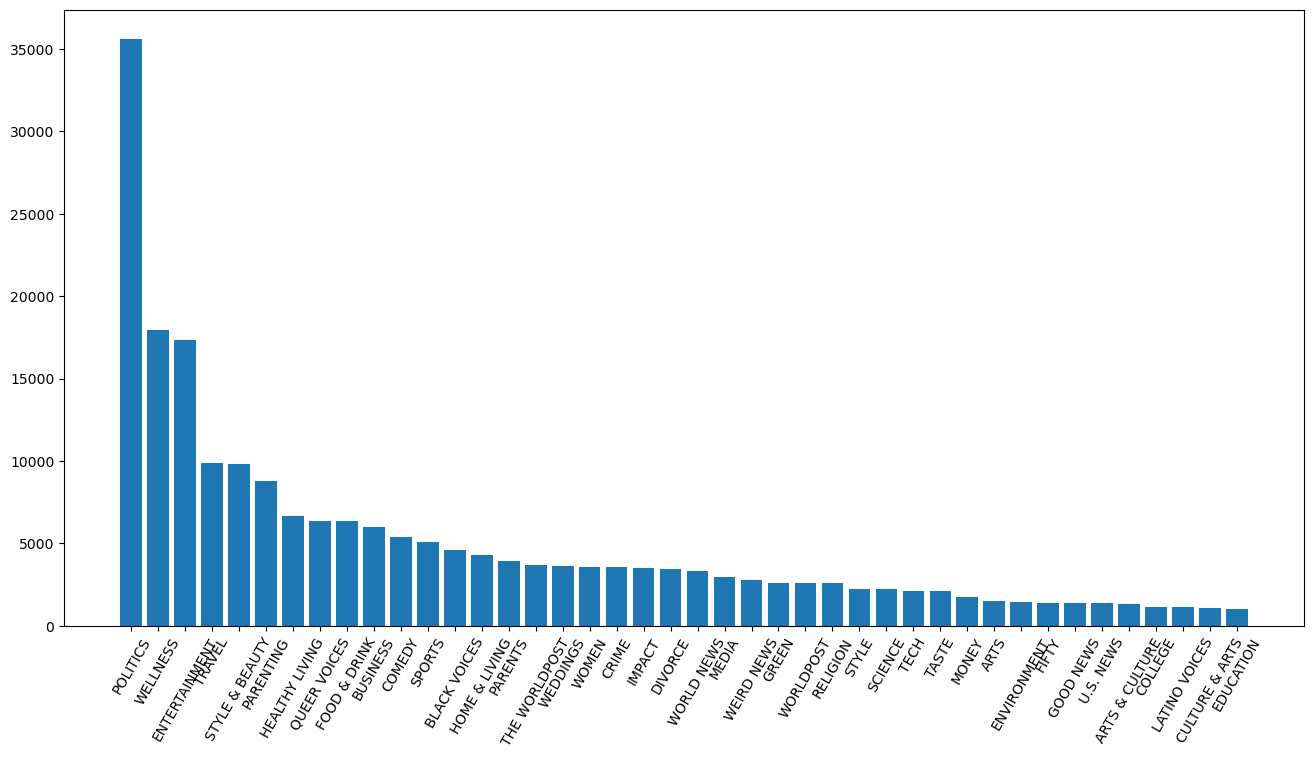

In [39]:
# Different categories
dataset['category'].value_counts().index
dataset['category'].value_counts().values

plt.figure(figsize=(16,8))

plt.bar(dataset['category'].value_counts().index, dataset['category'].value_counts().values)

plt.xticks(rotation=60)

plt.show()

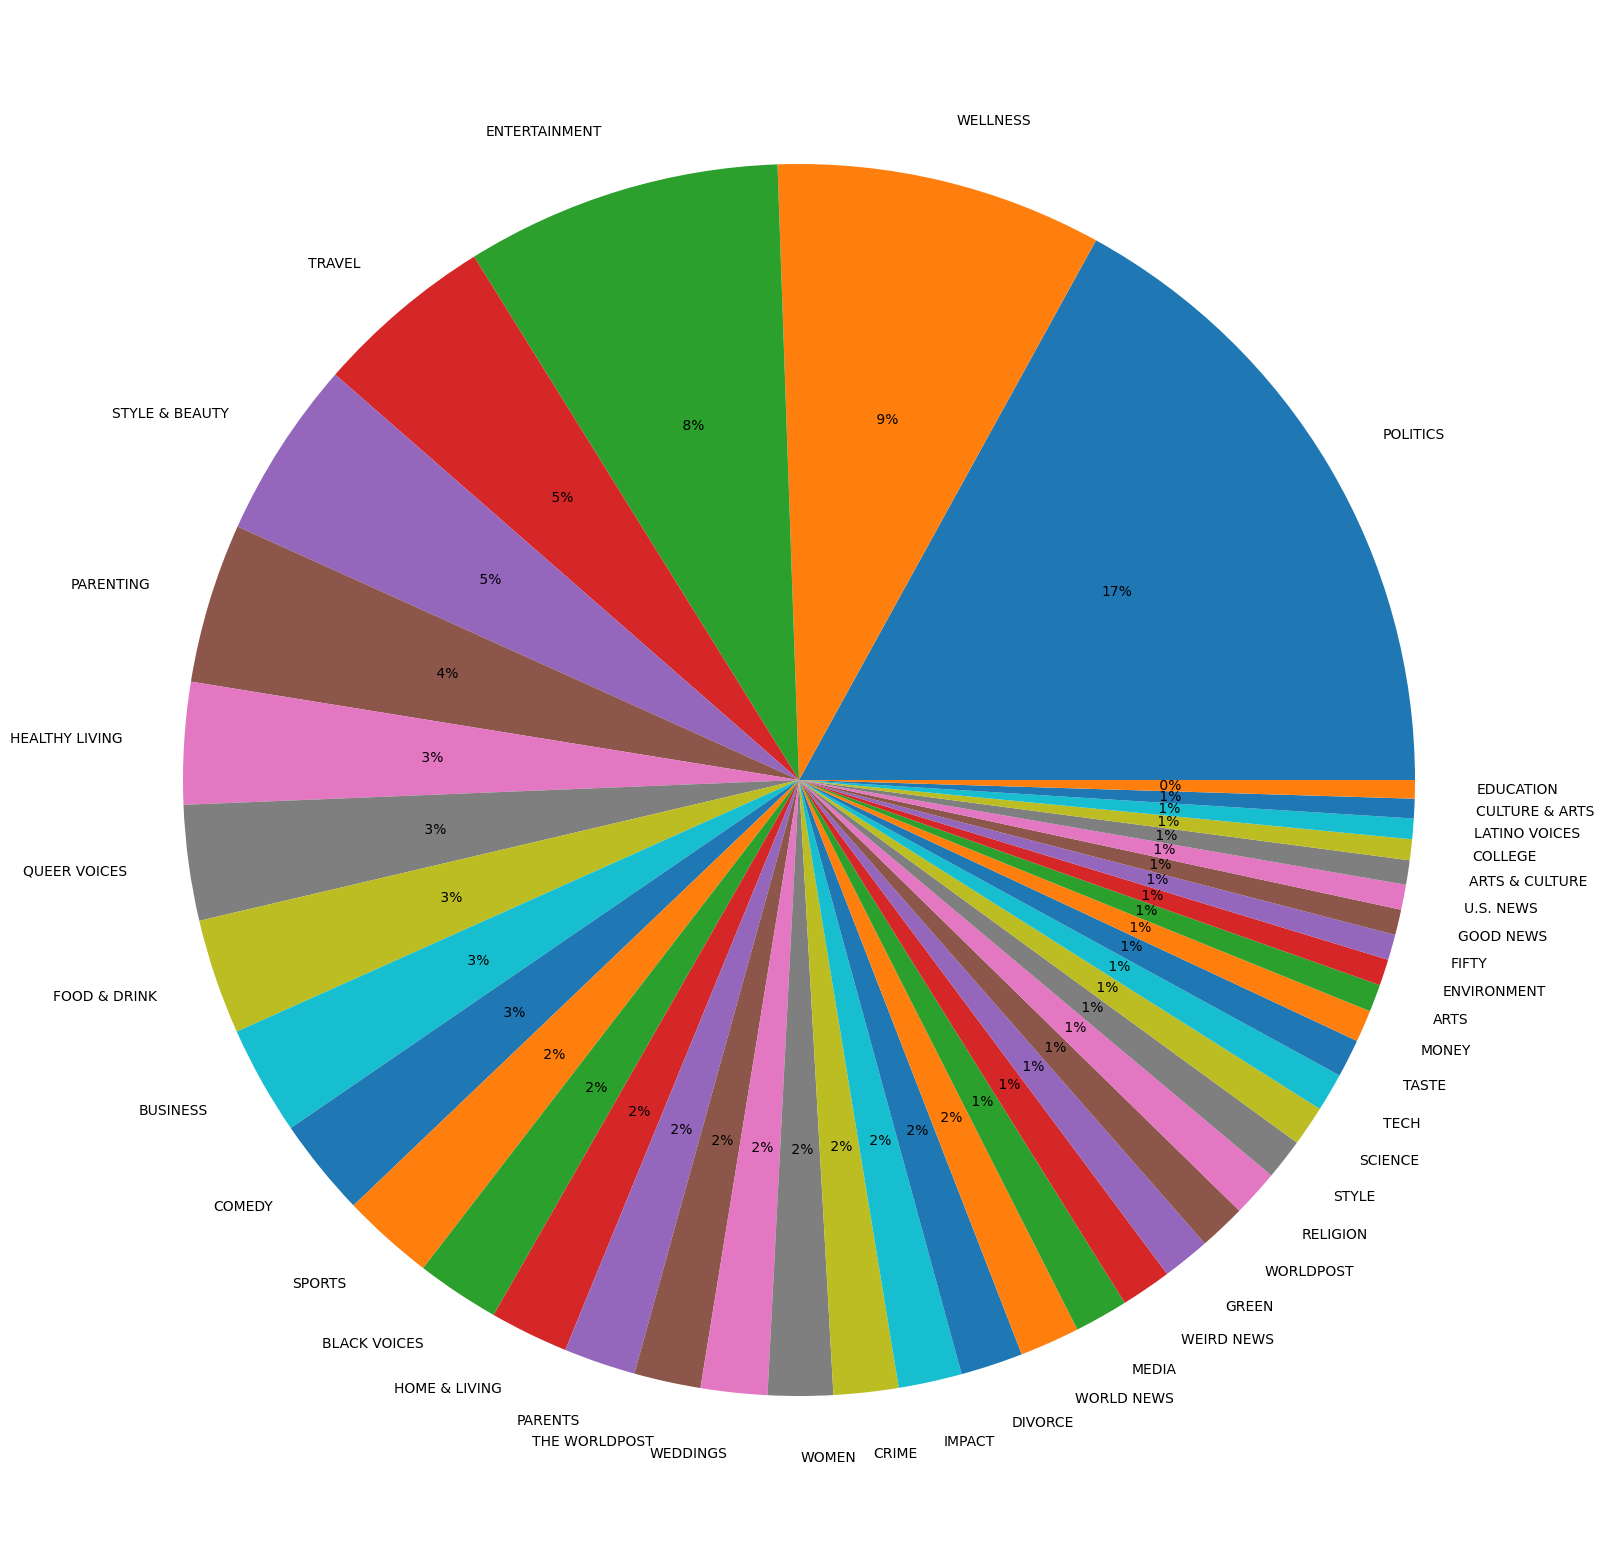

In [40]:
plt.figure(figsize=(20,20))

plt.pie(dataset['category'].value_counts().values, autopct='%2.0f%%', labels=dataset['category'].value_counts().index)

plt.show()

Seems like most of the news are politial news. To make a classification of the news based on the label, the data is not evenly distributed. So we may only consider the 4 clusters: political news, wellness, entertainment, and others. We need to build a training set of 15000 news for each category and in total 60000 news.

# Data pre-processing

## 1: remove null:

In [41]:
dataset.isnull()

,link,headline,category,short_description,authors,date
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
209522,False,False,False,False,False,False
209523,False,False,False,False,False,False
209524,False,False,False,False,False,False
209525,False,False,False,False,False,False


In [42]:
dataset.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

There is no null element.

## 2: Drop the url link column

In [43]:
dataset = dataset.drop('link', axis=1)

In [44]:
dataset.head()

,headline,category,short_description,authors,date
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


## 3: Clear the empty elements

In [45]:
dataset[dataset['headline'] == '']

,headline,category,short_description,authors,date
90944,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30
103675,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
109100,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
110153,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
122145,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28


In [46]:
dataset[dataset['short_description'] == '']

,headline,category,short_description,authors,date
20773,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...
206924,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [47]:
dataset_cleared = dataset[(dataset['headline'] != '') | (dataset['short_description'] != '')]

In [48]:
dataset_cleared[dataset_cleared['headline']=='']

,headline,category,short_description,authors,date
95567,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30


In [49]:
dataset_cleared[dataset_cleared['short_description']=='']

,headline,category,short_description,authors,date
20773,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...
206924,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


## 4: Remove the duplicate

In [53]:
print('In the headline column there are ', dataset_cleared['headline'].duplicated().sum(), 'duplicates.')
print('In the short description column there are', dataset_cleared['short_description'].duplicated().sum(), 'duplicates.')

In the headline column there are  1526 duplicates.
In the short description column there are 22500 duplicates.


In [55]:
dataset_cleared[(dataset_cleared['headline'].duplicated() == True) & (dataset_cleared['short_description'].duplicated() == True)]

,headline,category,short_description,authors,date
5226,Netanyahu Holds Solid Lead In Israeli Elections,WORLD NEWS,Early exit polls show Prime Minister Benjamin ...,"Aron Heller, AP",2020-03-02
18164,The Funniest Tweets From Parents This Week,PARENTS,"Kids may say the darndest things, but parents ...",Hollis Miller,2017-12-15
19009,"With This 'Shape Of Water' Clip, You'll Fall F...",ENTERTAINMENT,Spencer and Sally Hawkins play 1960s janitors ...,Matthew Jacobs,2017-12-05
19069,Abortion Isn’t Main Reason More Republicans St...,POLITICS,Would the Democrats’ Alabama Senate candidate ...,Amanda Terkel,2017-12-04
19094,35 Hilarious Holiday Card Outtakes,PARENTS,These kids were clearly not in the Christmas s...,Caroline Bologna,2017-12-04
...,...,...,...,...,...
208789,'Black Love' Wedding Announcements (PHOTOS),BLACK VOICES,"""Black Love"" Wedding Announcements: Getting ma...",Julee Wilson,2012-02-05
208893,Watch The Top 9 YouTube Videos Of The Week,TECH,If you're looking to see the most popular YouT...,Catharine Smith,2012-02-04
208929,Weekly Roundup of eBay Vintage Clothing Finds ...,STYLE & BEAUTY,No time to page through thousands of eBay list...,"Mary Kincaid, Contributor\nFounder and Editor ...",2012-02-03
209148,"We're Getting A Divorce, Now What?",DIVORCE,Every divorce has unique circumstances that ca...,"Women & Co, Contributor\nPersonal finance sour...",2012-02-01


In [58]:
dataset_cleared = dataset_cleared.drop_duplicates(subset=['headline'], keep = 'last')

In [61]:
dataset_cleared1 = pd.concat([dataset_cleared[dataset_cleared['short_description'] == ''], 
                              dataset_cleared[dataset_cleared['short_description'] != ''].drop_duplicates(subset = 
                              ['short_description'], keep = 'last')])

# Keep the short description '' elements

In [62]:
dataset_cleared1[dataset_cleared1['short_description'].duplicated() == True]

,headline,category,short_description,authors,date
21523,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
35692,Note: This content has been removed.,WOMEN,,Jenavieve Hatch,2017-05-10
...,...,...,...,...,...
206924,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [63]:
dataset_cleared1['category'].value_counts()

category
POLITICS          35015
WELLNESS          17617
ENTERTAINMENT     17102
TRAVEL             9843
STYLE & BEAUTY     8984
PARENTING          8709
HEALTHY LIVING     6605
FOOD & DRINK       6325
QUEER VOICES       6172
BUSINESS           5962
COMEDY             5284
SPORTS             5040
BLACK VOICES       4517
HOME & LIVING      4089
PARENTS            3803
THE WORLDPOST      3655
WEDDINGS           3588
CRIME              3554
IMPACT             3464
WOMEN              3418
DIVORCE            3397
WORLD NEWS         3288
MEDIA              2926
WEIRD NEWS         2720
GREEN              2606
WORLDPOST          2577
RELIGION           2489
SCIENCE            2192
STYLE              2180
TASTE              2055
TECH               2007
MONEY              1754
ARTS               1505
FIFTY              1401
GOOD NEWS          1384
U.S. NEWS          1377
ENVIRONMENT        1369
ARTS & CULTURE     1321
COLLEGE            1143
LATINO VOICES      1126
CULTURE & ARTS     1050
EDUCATI